# Fit Hindmars Rose into HH model noisy traces

In [1]:
import pandas as pd
import numpy as np

In [2]:
from brian2 import *
from brian2tools import *

prefs.codegen.target = 'cython'  # weave is not multiprocess-safe!

WARNING    /home/alteska/anaconda3/envs/brian_opt/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
 [py.warnings]


## Setup Parametrs

In [3]:
dt = 0.01*ms
defaultclock.dt = dt

### Load Input and Output

In [4]:
df_inp_traces = pd.read_csv('input_traces_hh.csv')
df_out_traces = pd.read_csv('output_traces_hh.csv')

In [5]:
inp_traces = df_inp_traces.to_numpy()
inp_traces = inp_traces[0:1, 1:]
inp_traces

array([[0., 0., 0., ..., 0., 0., 0.]])

In [6]:
out_traces = df_out_traces.to_numpy()
out_traces = out_traces[0:1, 1:]
out_traces

array([[-63.54211145, -65.52491616, -62.90054542, ..., -81.5252667 ,
        -82.30107475, -82.04870895]])

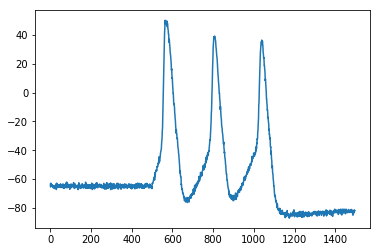

In [7]:
plot(out_traces[0]);

# Model Fitting 

In [8]:
eqs = Equations('''
dx/dt = (y - a*x**3 + b*x**2 + 3 * I/nA - z)/time_unit : 1
dy/dt = (c - d*x**2 - y)/time_unit : 1
dz/dt = r*(s*(x - x_1) - z)/time_unit : 1
v = (base + x * scale)*mV :volt
base: 1 (constant)
scale: 1 (constant)
a: 1 (constant)
b: 1 (constant)
c: 1 (constant)
d: 1 (constant)
r: 1 (constant)
s: 1 (constant)
x_1: 1 (constant)
''',

time_unit=1*ms)

In [9]:
start_scope()
n_opt = NevergradOptimizer(method='TwoPointsDE')
metric = MSEMetric()

In [10]:
def callback(res, errors, parameters, index):
    print('index {} errors minimum: {}'.format(index, min(errors)) )

In [11]:
res, error = fit_traces(model=eqs, input_var='I', output_var='v',
                       input=inp_traces * amp, output=out_traces*mV, dt=dt,
                       method='rk4',
                       callback=callback,
                       scale = [10, 50], 
                       base = [-30, 0],
                       a = [0, 20],
                       b = [0, 20],
                       c = [0, 20],
                       d = [0, 20],
                       r = [0.0001, 0.01],
                       s = [0, 10],
                       x_1 = [-5, 5],
                       param_init={'x': -1.6, 'y':1 - 5*(-1.6)**2, 'z':0.001*(4*(-1.6 - -1.6))}, 
                       n_rounds=100, n_samples=30, optimizer=n_opt, metric=metric
                       )

res

index 0 errors minimum: 4.6539386251795385
index 1 errors minimum: 3.6829705227428375
index 2 errors minimum: 3.9522523767551103
index 3 errors minimum: 4.014420179804709
index 4 errors minimum: 3.904956102305288
index 5 errors minimum: 3.2859719002728194
index 6 errors minimum: 2.943947851701983
index 7 errors minimum: 1.7590133125844245
index 8 errors minimum: 1.3164432614446646
index 9 errors minimum: 1.6810808478095773
index 10 errors minimum: 1.5240443413686169
index 11 errors minimum: 1.6037877364703383
index 12 errors minimum: 1.6564910155240467
index 13 errors minimum: 1.5574894410229385
index 14 errors minimum: 1.3835457483351927
index 15 errors minimum: 1.3835457483351927
index 16 errors minimum: 1.3619082283023305
index 17 errors minimum: 1.1302641320016213
index 18 errors minimum: 1.2742360511644693
index 19 errors minimum: 1.1302641320016213
index 20 errors minimum: 1.2564686351933878
index 21 errors minimum: 1.2564686351933878
index 22 errors minimum: 1.2614942750815699
i

{'base': -26.933343632666453,
 'a': 1.768523857164853,
 'b': 8.475646490292387,
 'r': 0.007769861563136966,
 'c': 3.8203142379430695,
 'd': 15.601352359404746,
 'scale': 18.68517581646187,
 's': 0.386388384595028,
 'x_1': -0.0104106850998105}

### visualization of the results

In [12]:
start_scope()
fits = generate_fits(model=eqs, method='rk4', params=res,
                     input=inp_traces * amp, input_var='I', output_var='v',
                     dt=dt, param_init={'x': -1.6, 'y':1 - 5*(-1.6)**2, 'z':0.001*(4*(-1.6 - -1.6))}, 
                    )

x = fits/mV

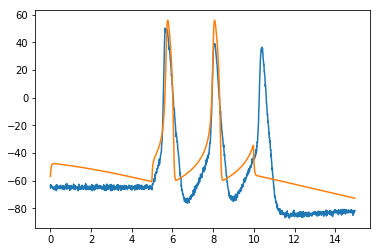

In [13]:
plot(np.arange(len(out_traces[0]))*dt/ms, out_traces[0], label='goal');
plot(np.arange(len(fits[0]))*dt/ms, fits[0]/mV, label='fit');

# Second Trace

In [21]:
inp_traces = df_inp_traces.to_numpy()
inp_traces = inp_traces[1:2, 1:]
inp_traces

array([[0., 0., 0., ..., 0., 0., 0.]])

In [24]:
out_traces = df_out_traces.to_numpy()
out_traces = out_traces[1:2, 1:]
out_traces

array([[-63.78548155, -64.75587972, -64.60550311, ..., -64.42127691,
        -65.13069593, -64.48718384]])

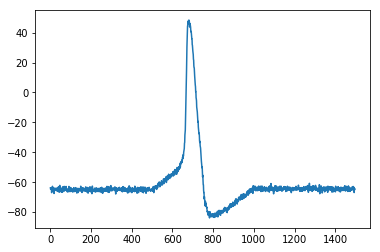

In [25]:
plot(out_traces[0]);

# Model Fitting 

In [26]:
eqs = Equations('''
dx/dt = (y - a*x**3 + b*x**2 + 3 * I/nA - z)/time_unit : 1
dy/dt = (c - d*x**2 - y)/time_unit : 1
dz/dt = r*(s*(x - x_1) - z)/time_unit : 1
v = (base + x * scale)*mV :volt
base: 1 (constant)
scale: 1 (constant)
a: 1 (constant)
b: 1 (constant)
c: 1 (constant)
d: 1 (constant)
r: 1 (constant)
s: 1 (constant)
x_1: 1 (constant)
''',

time_unit=1*ms)

In [27]:
start_scope()
n_opt = NevergradOptimizer(method='TwoPointsDE')
metric = MSEMetric()

In [28]:
def callback(res, errors, parameters, index):
    print('index {} errors minimum: {}'.format(index, min(errors)) )

In [29]:
res, error = fit_traces(model=eqs, input_var='I', output_var='v',
                       input=inp_traces * amp, output=out_traces*mV, dt=dt,
                       method='rk4',
                       callback=callback,
                       scale = [10, 50], 
                       base = [-30, 0],
                       a = [0, 20],
                       b = [0, 20],
                       c = [0, 20],
                       d = [0, 20],
                       r = [0.0001, 0.01],
                       s = [0, 10],
                       x_1 = [-5, 5],
                       param_init={'x': -1.6, 'y':1 - 5*(-1.6)**2, 'z':0.001*(4*(-1.6 - -1.6))}, 
                       n_rounds=100, n_samples=30, optimizer=n_opt, metric=metric
                       )

res

index 0 errors minimum: 3.8219896990307065
index 1 errors minimum: 0.5780033133289342
index 2 errors minimum: 0.5780033133289342
index 3 errors minimum: 0.6130372976175761
index 4 errors minimum: 0.76893893734913
index 5 errors minimum: 0.6344361000655496
index 6 errors minimum: 0.6344361000655496
index 7 errors minimum: 0.6033522861604284
index 8 errors minimum: 0.5801162012067164
index 9 errors minimum: 0.5960779563572779
index 10 errors minimum: 0.6369858694393464
index 11 errors minimum: 0.5780033133289342
index 12 errors minimum: 0.5764412123096053
index 13 errors minimum: 0.5902513286722082
index 14 errors minimum: 0.5862156165602873
index 15 errors minimum: 0.5849264028977296
index 16 errors minimum: 0.5764412123096053
index 17 errors minimum: 0.58369391511955
index 18 errors minimum: 0.5850401602998341
index 19 errors minimum: 0.5764412123096053
index 20 errors minimum: 0.573237601926785
index 21 errors minimum: 0.573237601926785
index 22 errors minimum: 0.5685645464815406
inde

{'base': -28.017263353359365,
 'a': 3.797843840443237,
 'b': 10.322554797746303,
 'r': 0.009204664149461412,
 'c': 2.914200041200181,
 'd': 16.494991214567378,
 'scale': 38.49190638045689,
 's': 6.863813968431657,
 'x_1': -4.377809547849507}

### visualization of the results

In [32]:
start_scope()
fits = generate_fits(model=eqs, method='rk4', params=res,
                     input=inp_traces * amp, input_var='I', output_var='v',
                     dt=dt, param_init={'x': -1.6, 'y':1 - 5*(-1.6)**2, 'z':0.001*(4*(-1.6 - -1.6))}, 
                    )

x = fits/mV

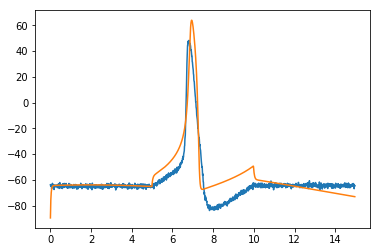

In [34]:
plot(np.arange(len(out_traces[0]))*dt/ms, out_traces[0], label='goal');
plot(np.arange(len(fits[0]))*dt/ms, fits[0]/mV, label='fit');